In [45]:
# let's first set up our working environment

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [46]:
# we will import data to play with
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='.')

In [47]:
# extract contents from the mnist dictionary
data = mnist['data']
labels = mnist['target']

print 'The type of data and labels are:', type(data), type(labels)
print 'The shapes of data and labels are:', data.shape, labels.shape

The type of data and labels are: <type 'numpy.ndarray'> <type 'numpy.ndarray'>
The shapes of data and labels are: (70000, 784) (70000,)


/Users/iranroman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 70000 + 1) instead
  from ipykernel import kernelapp as app


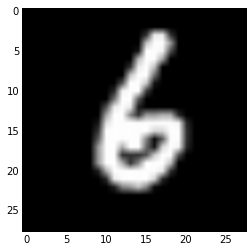

The label for this picture is:  6.0


In [48]:
# let's look at the first image in the dataset
rand_pic = np.random.random_integers(70000)

image_1 = data[rand_pic,:].reshape(28,28)

plt.imshow(image_1, cmap=plt.get_cmap('gray'))
plt.show()

# Let's also print the label associated with this handwritten number
label_1 = labels[rand_pic]

print 'The label for this picture is: ', label_1

In [49]:
# We will now grab a random picture, and we will generate a Weight matrix, 
# that let's us classify the picture to its belonging class
rand_pic = np.random.random_integers(70000)

image_1 = data[rand_pic,:]

# parameters

num_classes = 10
num_features = 784

# The main task is to generate a weight matrix that we can use to classify our image
# we will need 10 rows, which correspond to the 10 classes of handwritten numbers
# and 784 columns, corresponding to each of the pixels in our pictures.

W = np.random.randn(num_classes,num_features)

# let's try our weight matrix, and let's see how it does

scores = np.dot(W,image_1.T)

print 'The scores are: ', scores

norm_scores = scores - np.max(scores)

print 'The normalized scores are: ', norm_scores

# apply a simple method to turn the values in scores into probabilities
# this method is softmax
label_probs = np.exp(norm_scores) / np.sum(np.exp(norm_scores))

print 'The probabilities for each of the classes, according to the NN are:', label_probs


# let's check how good the randomly generate weight matrix was. The highest value in scores, is the predicted label

predicted_label = np.where(label_probs == np.max(label_probs))

print 'The predicted label is: ', predicted_label[0], 'and the actual label is: ', labels[rand_pic]

The scores are:  [ 4312.40857737 -1176.45453088 -2890.38455198 -4280.48606719  3367.30533029
   961.08305397 -1235.66222717 -1962.037894    -546.64908861  1248.69028611]
The normalized scores are:  [    0.         -5488.86310825 -7202.79312935 -8592.89464456  -945.10324708
 -3351.3255234  -5548.07080454 -6274.44647137 -4859.05766598 -3063.71829126]
The probabilities for each of the classes, according to the NN are: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
The predicted label is:  [0] and the actual label is:  7.0


/Users/iranroman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 70000 + 1) instead
  app.launch_new_instance()


In [61]:
# He we will implement a neral network that gets trained on our dataset:

# we will need more data. You cannot train the neural network on a single picture
# Let's generate a variable called X, that will contain our training data

# this is the actual data
X1 = data[0:100]
X2 = data[7000:7100]
X3 = data[14000:14100]
X = np.vstack([X1,X2,X3])

# but don't forget the labels
y1 = labels[0:100]
y2 = labels[7000:7100]
y3 = labels[14000:14100]
y = np.hstack([y1,y2,y3])

print 'the shape of our Xs are:', X1.shape, X2.shape, X3.shape
print 'the shape of our X is:', X.shape
print 'the shape of our y is:', y.shape

the shape of our Xs are: (100, 784) (100, 784) (100, 784)
the shape of our X is: (300, 784)
the shape of our y is: (300,)


/Users/iranroman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 300 + 1) instead
  from ipykernel import kernelapp as app


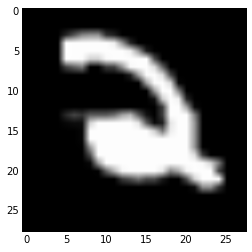

The label for this picture is:  2.0


In [70]:
# let's look at the first imagein the dataset
rand_pic = np.random.random_integers(300)

rand_pic = 299

image_1 = X[rand_pic,:].reshape(28,28)

plt.imshow(image_1, cmap=plt.get_cmap('gray'))
plt.show()

# Let's also print the label associated with this handwritten number
label_1 = y[rand_pic]

print 'The label for this picture is: ', label_1

In [100]:
# Here wil set up the parameters for our neural network
N = 100 # number of points per class
D = 28*28 #Dimensionality of each datapoint
K = 3 # Number of classes
num_examples = N*K
learning_rate = 0.0001

#### INITIALIZATION ######
# To train a neural network, the first step is to initialize the
# Weight matrix, which in this case will have shape
# K by D
W = 0.01 * np.random.randn(D,K)
# We also need to initialize the boas vector
b = np.zeros([1,K])

y = y.astype(int)

for iteration in range(100000):

    ##### FORWARD PASS [1 LAYER] ####
    # let's carry out the forward pass through the softmax activation
    scores = np.dot(X, W) + b
    
    # we can pass our scores matrix through our activation function
    # in this case it will be softmax
    probs = np.exp(scores)/np.sum(np.exp(scores),axis = 1, keepdims = True)
    
    # we now have to compute the loss, for which we need the probability
    # for each of the correct labels (this is also called the cross-entropy loss)
    correct_probs = probs[range(num_examples),y]
    
    # pass through the negative log
    correct_log_probs = -np.log(correct_probs)
    
    #### CALCULATE THE LOSS ####
    loss = np.sum(correct_log_probs)/num_examples
    if iteration % 1000 == 0:
        print 'the current loss, at iteration %d is: ' % iteration, loss         
        
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores = dscores / num_examples
    
    # backpropagate to W 
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis = 0, keepdims = True)
    
    # This is where the magic happens!
    # we will update our weight matrix and our bias
    W = W - learning_rate*dW
    b = b - learning_rate*db

the current loss, at iteration 0 is:  21.6337608218
the current loss, at iteration 1000 is:  3.62425899062e-05
the current loss, at iteration 2000 is:  1.86961757853e-05
the current loss, at iteration 3000 is:  1.26605019548e-05
the current loss, at iteration 4000 is:  9.60191875006e-06
the current loss, at iteration 5000 is:  7.75307684927e-06


KeyboardInterrupt: 

In [101]:
# let's test how good this is:
# let's grab a new picture that the network has not seen before:

test_pic = data[101,:]

print 'The size of test_pic is: ', test_pic.shape
print 'the size of our weight matrix and bias are:', W.shape, b.shape

The size of test_pic is:  (784,)
the size of our weight matrix and bias are: (784, 3) (1, 3)


In [103]:
# We multiply our test_pic by our W and b after training.

test_scores = np.dot(test_pic.T,W) + b

print 'The shape and type of test_scores are:', test_scores.shape, type(test_scores)

print 'The test_scores are:', test_scores

print 'and the actual label for this picture is:', labels[101]

The shape and type of test_scores are: (1, 3) <type 'numpy.ndarray'>
The test_scores are: [[ 60.6678116  -37.24748248  -4.99933661]]
and the actual label for this picture is: 0.0
